<a href="https://colab.research.google.com/github/shaimaa122/Customer_Churn_ML_Project/blob/main/01_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group members:
- Shaima Aharbi
- Ebtisam Alruhili

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


### Explore Data

In [2]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2022,9588-OZDMQ,Female,0,Yes,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.00,89.75,No
5603,0895-LNKRC,Male,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.5,No
2154,7526-IVLYU,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.65,68.35,No
1026,0354-WYROK,Female,1,Yes,Yes,31,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.90,2911.3,Yes
4586,3397-AVTKU,Male,0,No,No,43,Yes,No,DSL,No,Yes,No,No,No,Yes,Two year,Yes,Electronic check,60.00,2548.55,No


In [3]:
df.columns # names of columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236
std,0.368226,24.529521,29.992970
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.600000


In [6]:
df.isna().sum() #check if there's a null data 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.value_counts() # check the values in data

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3374-TTZTK  Male    0              Yes      No          52      Yes           No                Fiber optic      Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  Two year        Yes               Electronic check           106.30          5487   

In [8]:
 df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,5384-ZTTWP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


In [9]:
df.Churn.value_counts() # how many Yes, No in Churn

No     4650
Yes    1688
Name: Churn, dtype: int64

In [10]:
df.Contract.value_counts() # how many values in Contract

Month-to-month    3503
Two year          1523
One year          1312
Name: Contract, dtype: int64

In [11]:
df.customerID.unique()  #check the values in Customer ID 

array(['5087-SUURX', '1764-VUUMT', '0089-IIQKO', ..., '9924-JPRMC',
       '4098-NAUKP', '1775-KWJKQ'], dtype=object)

In [12]:
len(df.customerID.unique()) #check the length of Customer ID 

6338

In [13]:
df.corr() # to find the correlation between numerical columns

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.020302,0.216512
tenure,0.020302,1.000000,0.253420
MonthlyCharges,0.216512,0.253420,1.000000


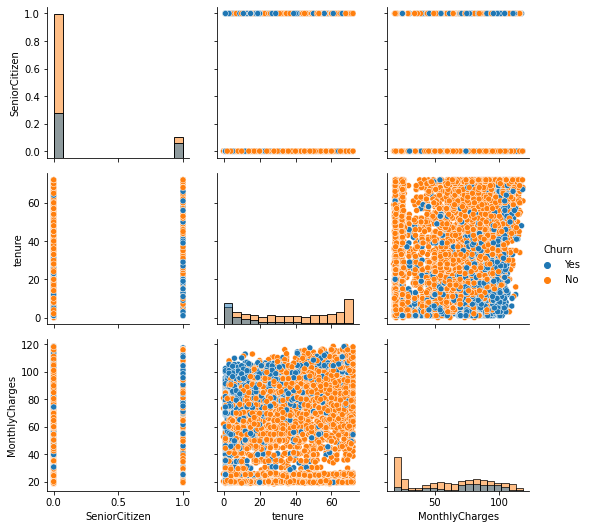

In [14]:
g = sns.PairGrid(df,hue="Churn")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

- Most of the customers in the company are non-senior, the number of non-senior customers who stay in the company is more than the number of senior customers.
- From tenure X tenure relationship most of the customers they stay in the company for more than 32 months.

### Visualization Based on Services

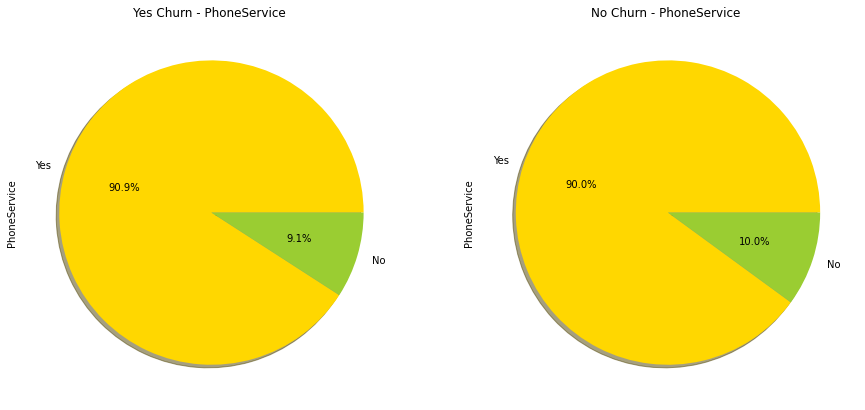

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,15))
#PhoneService - Whether the customer has a phone service or not
df['PhoneService'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['PhoneService'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - PhoneService ')
ax[1].set_title('No Churn - PhoneService ')

plt.show()

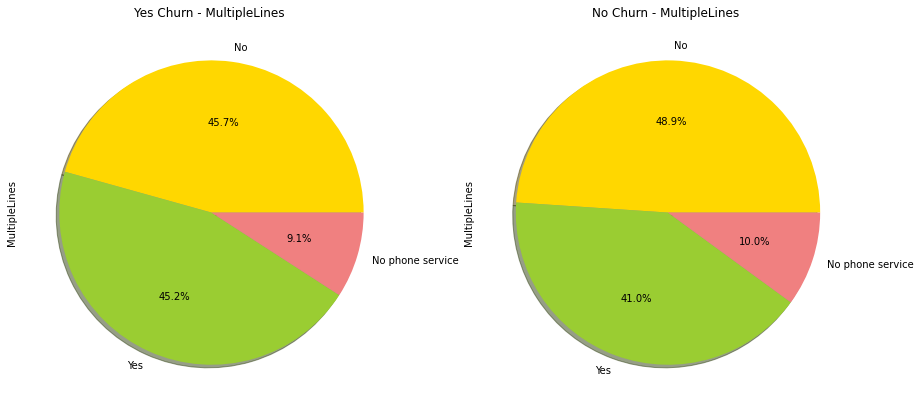

In [16]:
f,ax=plt.subplots(1,2,figsize=(15,15))
#MultipleLines - Whether the customer has multiple lines or not
df['MultipleLines'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['MultipleLines'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - MultipleLines ')
ax[1].set_title('No Churn - MultipleLines ')

plt.show()

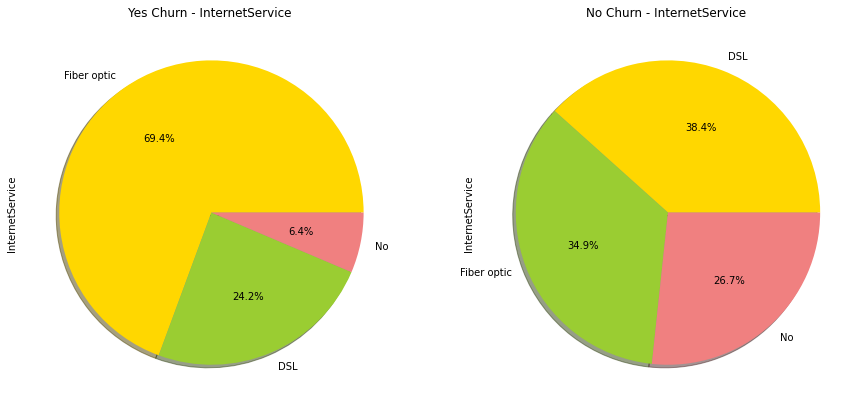

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,15))
#InternetService - Customers internet service provider
df['InternetService'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['InternetService'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - InternetService ')
ax[1].set_title('No Churn - InternetService ')

plt.show()

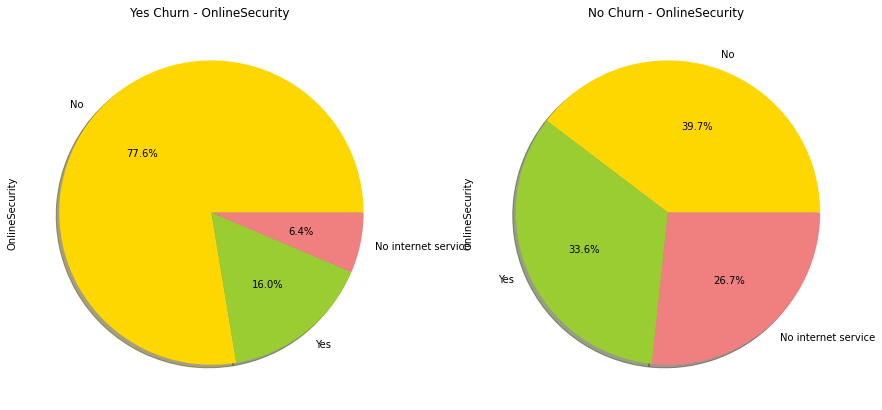

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,15))
#OnlineSecurity - Whether the customer has online security or not
df['OnlineSecurity'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['OnlineSecurity'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - OnlineSecurity ')
ax[1].set_title('No Churn - OnlineSecurity ')

plt.show()

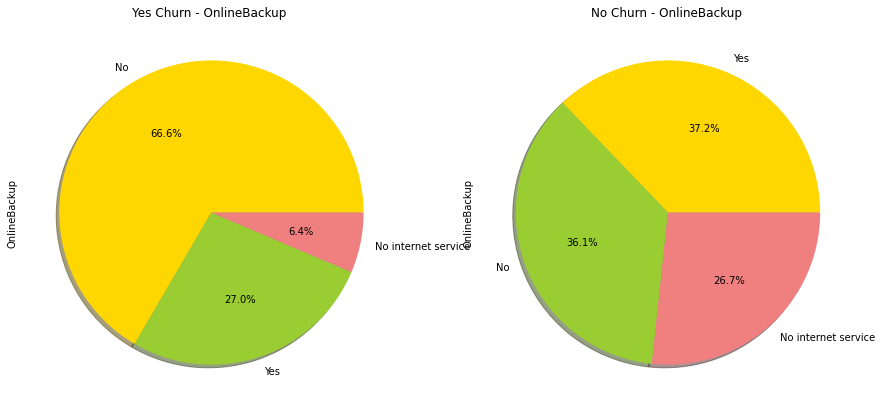

In [19]:
f,ax=plt.subplots(1,2,figsize=(15,15))
# OnlineBackup: Whether the customer has online backup or not
df['OnlineBackup'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['OnlineBackup'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - OnlineBackup ')
ax[1].set_title('No Churn - OnlineBackup ')

plt.show()

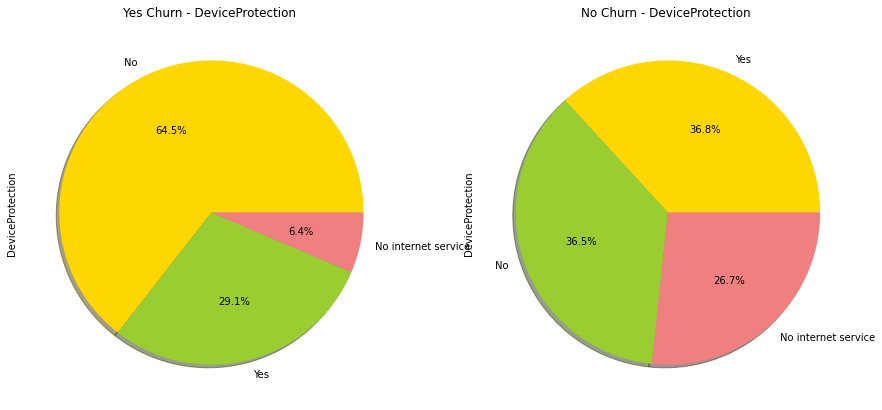

In [20]:
f,ax=plt.subplots(1,2,figsize=(15,15))
# DeviceProtection: Whether the customer has device protection or not
df['DeviceProtection'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['DeviceProtection'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - DeviceProtection ')
ax[1].set_title('No Churn - DeviceProtection ')

plt.show()

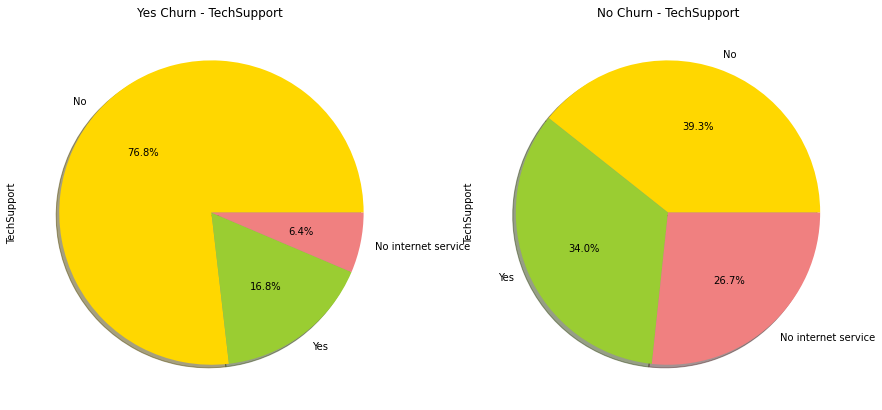

In [21]:
f,ax=plt.subplots(1,2,figsize=(15,15))
# TechSupport: Whether the customer has TechSupport or not
df['TechSupport'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['TechSupport'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - TechSupport ')
ax[1].set_title('No Churn - TechSupport')

plt.show()

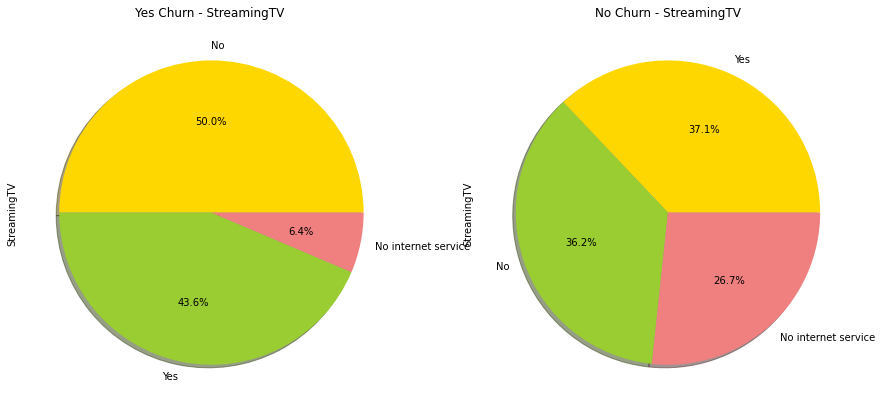

In [22]:
f,ax=plt.subplots(1,2,figsize=(15,15))
# StreamingTV: Whether the customer has StreamingTV or not
df['StreamingTV'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['StreamingTV'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - StreamingTV ')
ax[1].set_title('No Churn - StreamingTV')

plt.show()

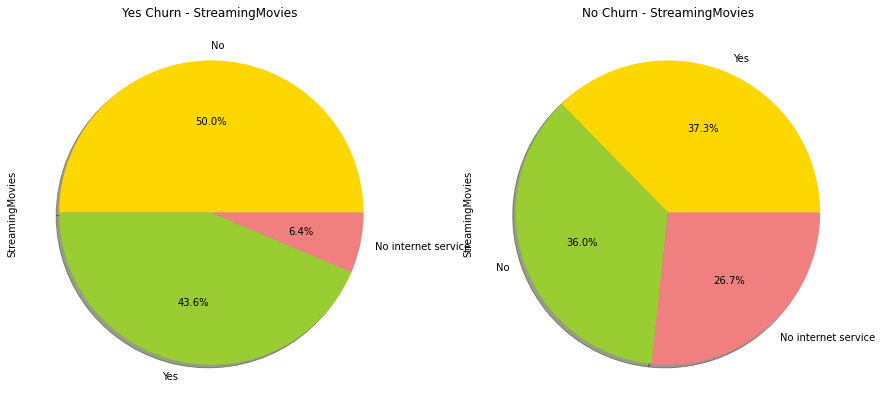

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,15))
# StreamingMovies: Whether the customer has StreamingMovies or not
df['StreamingMovies'][df['Churn']=='Yes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'])
df['StreamingMovies'][df['Churn']=='No'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=['Gold' ,'YellowGreen','LightCoral'] )

ax[0].set_title('Yes Churn - StreamingMovies ')
ax[1].set_title('No Churn - StreamingMovies')

plt.show()

We noticed from the chart:
- The price of the Fiber service is higher than the price of the DSL service

- We expect that the customers who subscribed to the Fiber service left the company due to the high price of the service, while most of the customers who had the DSL service did not leave it.

- Some services depends on other services like(online security and multiple lines )

- There are services that are not demanded by many customers like Online Security ,Oline backup, device protictio and tech support

In [24]:
df.TotalCharges[df['InternetService']=="Fiber optic"] #to explor the TotalCharges for Fiber optic

2        3767.4
3       1021.55
7        6567.9
8       2171.15
9        2697.4
         ...   
6332     7085.5
6333    3440.25
6334      137.1
6335    8547.15
6336     5683.6
Name: TotalCharges, Length: 2796, dtype: object

In [25]:
df.TotalCharges[df['InternetService']=="DSL"] #to explor the TotalCharges for DSL

0        669.85
4       1652.95
6       4820.55
10       865.75
11       368.85
         ...   
6323      25.05
6324      757.1
6325     593.75
6327    2023.55
6337     6562.9
Name: TotalCharges, Length: 2193, dtype: object

### Visualization Based  Customer account information:

Text(0.5, 1.0, 'The Customers Count of Cotract: ')

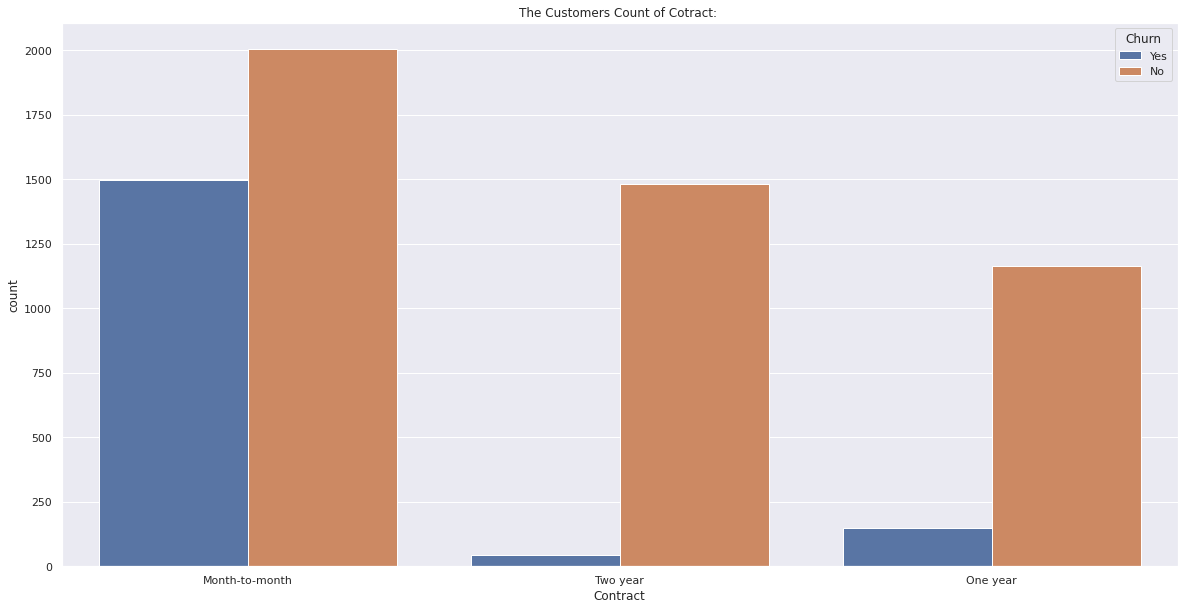

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=df, x=df.Contract, hue='Churn').set_title("The Customers Count of Cotract: ")

we noticed that:
- Customer who has Month to month contracts more than another contrat.
- Most of the Customer who leave the company were the ones who had a month to month cntract.


Text(0.5, 1.0, 'The Customers Count based on each Payment Method: ')

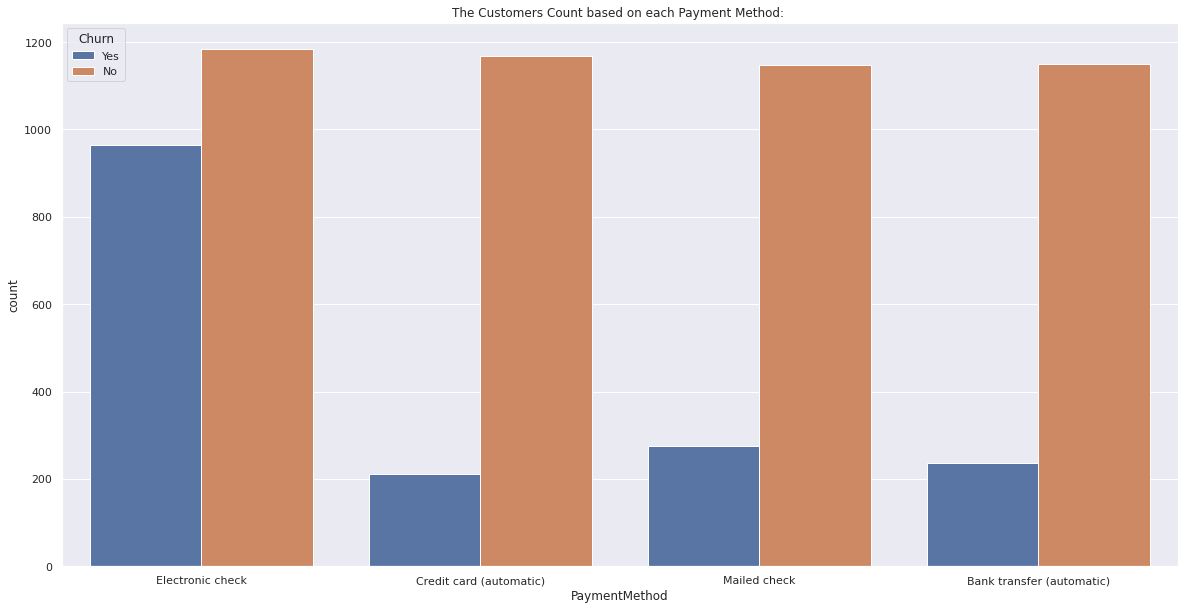

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=df, x=df.PaymentMethod, hue='Churn').set_title("The Customers Count based on each Payment Method: ")

we noticed that:
- Most of the Customer payied by electronic check and leave the compny.



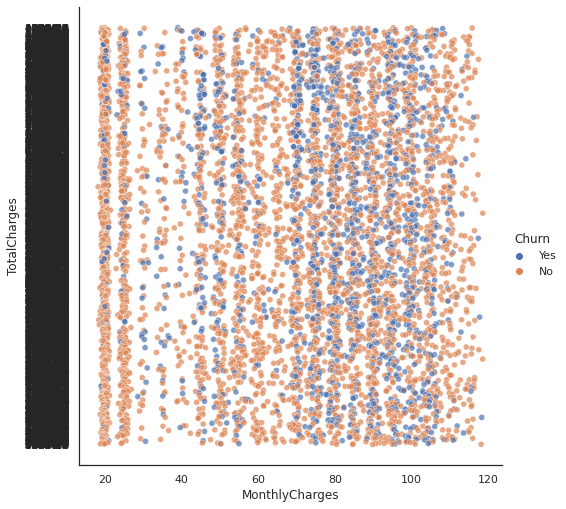

In [28]:
sns.set_theme(style="white")
color2=['LightCoral' ,'Gold','YellowGreen']
sns.relplot(x=df.MonthlyCharges, y=df.TotalCharges, hue="Churn", 
            sizes=(50, 400), alpha=0.7,
            height=7, data=df) 

### Visualization Based on Demographic info about customers


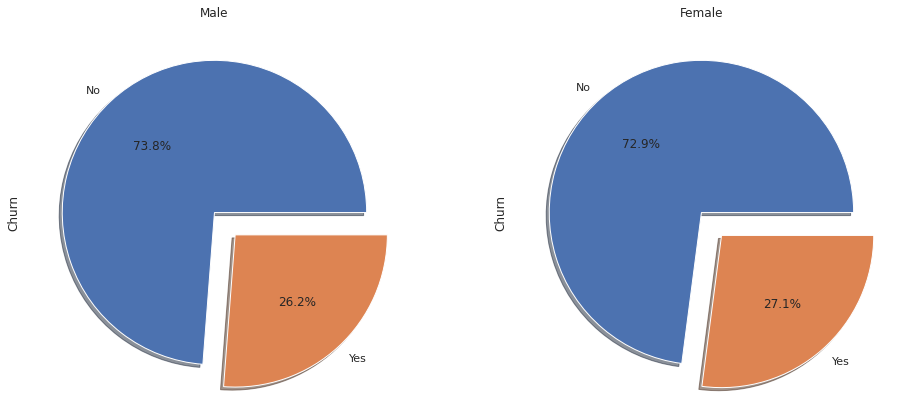

In [29]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Churn'][df['gender']=='Male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Churn'][df['gender']=='Female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Male')
ax[1].set_title('Female')
plt.show()

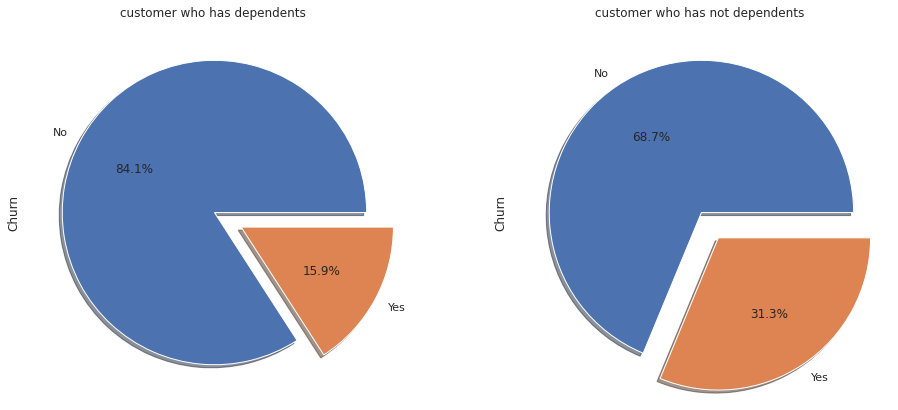

In [30]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Churn'][df['Dependents']=='Yes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Churn'][df['Dependents']=='No'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('customer who has dependents ')
ax[1].set_title('customer who has not dependents ')
plt.show()

- The number of customer who has not dependent and stay in the company is twice the number of customer who has dependent.
- We expect the customer leave company because have dependents, that's mean the customer who have dependents need more services. (More price)

### Extract Features:

#### Categorical Features:

In [31]:
df.value_counts() # check the columns values in data

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3374-TTZTK  Male    0              Yes      No          52      Yes           No                Fiber optic      Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  Two year        Yes               Electronic check           106.30          5487   

In [32]:
# check the unique values in service 
column_values = df[['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values) 

['Yes' 'No' 'No internet service']


###We decide to replace 'No internet service' to ' No ' Value (becomes these service depends on Internet Service ), that help us in the  model.

- When we convert, show us an waring massege like SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead

- We solve it by this code 'pd.options.mode.chained_assignment = None'


In [33]:
pd.options.mode.chained_assignment = None 
df['DeviceProtection'][df['DeviceProtection']=="No internet service" ] ="No"
df['OnlineBackup'][df['OnlineBackup']=="No internet service" ] ="No"
df['OnlineSecurity'][df['OnlineSecurity']=="No internet service" ] ="No"
df['StreamingMovies'][df['StreamingMovies']=="No internet service" ] ="No"
df['StreamingTV'][df['StreamingTV']=="No internet service" ] ="No"
df['TechSupport'][df['TechSupport']=="No internet service" ] ="No"

In [34]:
column_values = df[['DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport']].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values) # to check the unique columns value

['Yes' 'No']


create new data fram for Categorical data.

In [35]:
df_cat=pd.get_dummies(df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling' , 'PaymentMethod']])

In [36]:
df_cat.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0
3,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


Replace 'Yes' value to 1

In [37]:
df.Churn[df['Churn']=='Yes']=1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,1
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


Replace 'No' value to 0

In [38]:
df.Churn[df['Churn']=='No']=0
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,1
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),19.95,1269.1,0
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,0
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,0
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,0


#### Missing Values


###We try to convert totalcharge data type from object to int but we find some missing value in TotalCharges like " " as below code 

In [39]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges']) 

ValueError: ignored

In [40]:
df.TotalCharges[df['TotalCharges']==" " ] #Display the missing value

3046     
3182     
3525     
4002     
4378     
4773     
5570     
5630     
Name: TotalCharges, dtype: object

In [41]:
df.TotalCharges[df['TotalCharges']==" " ].count() #Count the missing values

8

In [42]:
df.TotalCharges.isnull().sum() # We noticed null values it didn't show us when we used [ .isnull().sum() ] function 

0

In [43]:
df.TotalCharges[df['TotalCharges']==" " ] ="0"

In [44]:
df.TotalCharges.iloc[5570] #Check if the value change it or not

'0'

In [45]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges']) #Convert TotalCharges data type from object to float
df['TotalCharges']

0        669.85
1       1269.10
2       3767.40
3       1021.55
4       1652.95
         ...   
6333    3440.25
6334     137.10
6335    8547.15
6336    5683.60
6337    6562.90
Name: TotalCharges, Length: 6338, dtype: float64

###We replace the missing value by the mean of TotalCharges column

In [46]:
mean_total =df['TotalCharges'].mean()
mean_total

2284.420700536447

In [ ]:
df.TotalCharges[df['TotalCharges']==0]= mean_total
df['TotalCharges']

In [ ]:
df.info() # TotalCharges data type is convert to float

In [ ]:
df_cat.head()


## Setting up a simple Logistic Regression
[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [48]:
X = pd.concat([df_cat,df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]], axis=1)
y = pd.to_numeric(df['Churn'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

Fit the model...

Note: I skipped a step in setting up the data...

In [52]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions...

In [54]:

pred = lr.predict(X_test)


From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
precision_score(y_test, pred)

0.6847290640394089

In [58]:
recall_score(y_test, pred)

0.5504950495049505

In [59]:
accuracy_score(y_test, pred)

0.81335436382755

In [ ]:
#mean_squared_error(y_test, pred)

----- 

In [ ]:
#cross_val_score(lr, X, y, scoring='balanced_accuracy')

In [69]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'saga', 'sag'],
    'logisticregression__multi_class': ['auto', 'ovr', 'multinomial'],
    # 'logisticregression__fit_intercept' :[True, False],
    # 'logisticregression__tol' : [ 0.00001, 0.0001]
              }

grid = GridSearchCV(LR(), param_grid, cv=7
)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [71]:
# fit the grid
grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [72]:
# show me the best params
grid.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__multi_class': 'auto',
 'logisticregression__solver': 'lbfgs'}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


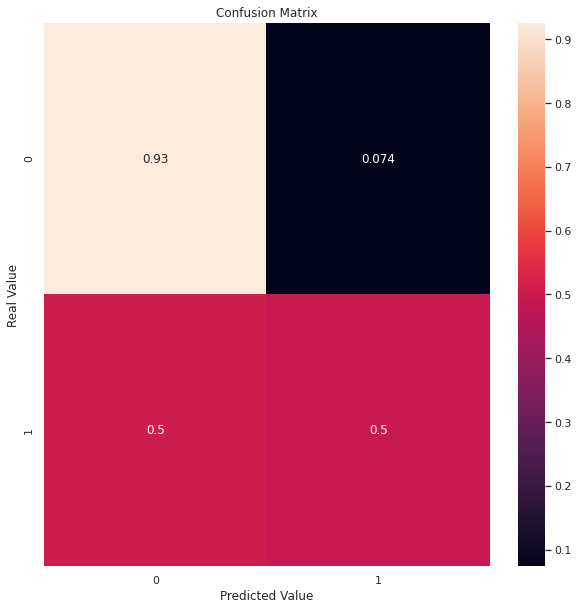

In [73]:
from sklearn.metrics import  confusion_matrix

lr = LogisticRegression(solver='lbfgs',C=0.01,multi_class='auto')
lr.fit(X_train, y_train)
# prediction
pred_lr = lr.predict(X_test)

# confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, pred_lr, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

In [74]:
precision_score(y_test, pred_lr)

0.7082152974504249

In [75]:
recall_score(y_test, pred_lr)

0.49504950495049505

In [76]:
accuracy_score(y_test, pred_lr)

0.8117770767613038

###Ideas for customer retrntion programs:

- We noticed the prices for the Fiber service are expensive, some discounts may help people increase their demand for the service.

- The company should apply discounts or offer on the most important service (Internet services) to increase the customers.

-  We noticed the most costumers have dependents dont stay in the company long because the higher price, should on the company make more offers for this class.


---
